In [2]:
import os

import mne

from mne.preprocessing import maxwell_filter

%matplotlib inline

In [17]:
data_path = '/storage/store/data/camcan/camcan47/cc700/meg/pipeline/release004/data/aamod_meg_get_fif_00001'
all_subjects = os.listdir(data_path)

# Number of subjects to process
sub_n = 1
sub_list = all_subjects[2]

# Global configs
maxwell_cal = 'sss_cal.dat'

In [18]:
sub_list

'CC110045'

In [20]:
main_path = os.path.join(data_path, sub_list)

raw_task = mne.io.read_raw_fif(os.path.join(main_path, 'task/task_raw.fif'))

Opening raw data file /storage/store/data/camcan/camcan47/cc700/meg/pipeline/release004/data/aamod_meg_get_fif_00001/CC110045/task/task_raw.fif...
    Read a total of 8 projection items:
        mag_ssp_upright.fif : PCA-mags-v1 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v2 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v3 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v4 (1 x 306)  idle
        mag_ssp_upright.fif : PCA-mags-v5 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v1 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v2 (1 x 306)  idle
        grad_ssp_upright.fif : PCA-grad-v3 (1 x 306)  idle
    Range : 21000 ... 563999 =     21.000 ...   563.999 secs
Ready.
Current compensation grade : 0


In [25]:
raw_sss = maxwell_filter(raw_task, calibration=maxwell_cal)

Maxwell filtering raw data
    No bad MEG channels
    Processing 204 gradiometers and 102 magnetometers
    Using fine calibration sss_cal.dat
        Adjusting non-orthogonal EX and EY
        Adjusted coil positions by (μ ± σ): 0.3° ± 0.3° (max: 1.3°)


<ipython-input-25-f74765405525>:1: RuntimeWarning: 102 T1/T2 magnetometer channel types found. If using SSS, it is advised to replace coil types using "fix_mag_coil_types".
  raw_sss = maxwell_filter(raw_task, calibration=maxwell_cal)


    Automatic origin fit: head of radius 87.5 mm
    Using origin -0.7, 8.9, 42.4 mm in the head frame
        Using 88/95 harmonic components for    0.000  (73/80 in, 15/15 out)
    Loading raw data from disk
    Processing 54 data chunks
[done]


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.2 - 60 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.20
- Lower transition bandwidth: 0.20 Hz (-6 dB cutoff frequency: 0.10 Hz)
- Upper passband edge: 60.00 Hz
- Upper transition bandwidth: 15.00 Hz (-6 dB cutoff frequency: 67.50 Hz)
- Filter length: 16501 samples (16.501 sec)



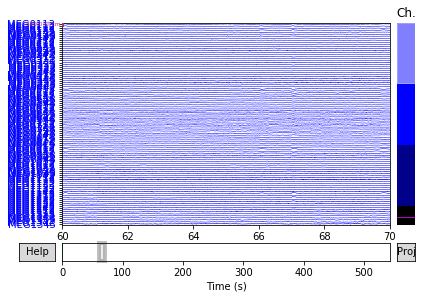

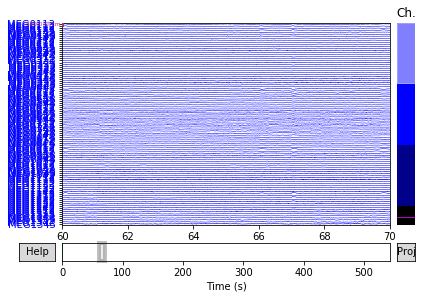

In [39]:
raw_filtered = raw_task.load_data().copy().filter(l_freq=0.2, h_freq=60)
raw_filtered.plot(start=60, n_channels=100)